<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.622972,56.254254,94.177280,0.691919,237.746425,237.050026,0.696400
1,0.0,1.0,23.928661,56.118126,39.600974,1.092180,130.739941,129.433899,1.306042
2,0.0,2.0,70.172034,58.762111,70.367359,0.152049,209.453553,209.251799,0.201754
3,0.0,3.0,53.321232,33.751511,70.024224,0.021573,167.118540,166.897162,0.221378
4,0.0,4.0,22.552355,36.612184,37.128557,-2.432330,103.860766,105.982615,-2.121850
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.164075,49.803791,26.786845,0.975949,122.730659,121.847378,0.883282
249996,999.0,246.0,64.334034,86.469683,86.585752,0.983195,248.372663,247.313491,1.059172
249997,999.0,247.0,35.430741,29.619601,90.602628,1.111251,166.764221,165.861090,0.903131
249998,999.0,248.0,39.936208,76.706634,27.137443,0.057779,153.838064,153.766412,0.071652


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.622972,56.254254,94.177280,0.691919,237.746425,237.050026,0.696400
1,0.0,1.0,23.928661,56.118126,39.600974,1.092180,130.739941,129.433899,1.306042
2,0.0,2.0,70.172034,58.762111,70.367359,0.152049,209.453553,209.251799,0.201754
3,0.0,3.0,53.321232,33.751511,70.024224,0.021573,167.118540,166.897162,0.221378
4,0.0,4.0,22.552355,36.612184,37.128557,-2.432330,103.860766,105.982615,-2.121850
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.164075,49.803791,26.786845,0.975949,122.730659,121.847378,0.883282
249996,999.0,246.0,64.334034,86.469683,86.585752,0.983195,248.372663,247.313491,1.059172
249997,999.0,247.0,35.430741,29.619601,90.602628,1.111251,166.764221,165.861090,0.903131
249998,999.0,248.0,39.936208,76.706634,27.137443,0.057779,153.838064,153.766412,0.071652


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.622972  56.254254  94.177280  ...  237.746425  237.050026  0.696400
      1.0    23.928661  56.118126  39.600974  ...  130.739941  129.433899  1.306042
      2.0    70.172034  58.762111  70.367359  ...  209.453553  209.251799  0.201754
      3.0    53.321232  33.751511  70.024224  ...  167.118540  166.897162  0.221378
      4.0    22.552355  36.612184  37.128557  ...  103.860766  105.982615 -2.121850
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  35.164075  49.803791  26.786845  ...  122.730659  121.847378  0.883282
      246.0  64.334034  86.469683  86.585752  ...  248.372663  247.313491  1.059172
      247.0  35.430741  29.619601  90.602628  ...  166.764221  165.861090  0.903131
      248.0  39.936208  76.706634  27.137443  ...  153.838064  153.766412  0.071652
      249.0  86.533429  41.873960  55.947420  ...  193.229168  194.344693 -1.115525

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.622972  56.254254  94.177280  ...  237.746425  237.050026  0.696400
      1.0    23.928661  56.118126  39.600974  ...  130.739941  129.433899  1.306042
      2.0    70.172034  58.762111  70.367359  ...  209.453553  209.251799  0.201754
      3.0    53.321232  33.751511  70.024224  ...  167.118540  166.897162  0.221378
      4.0    22.552355  36.612184  37.128557  ...  103.860766  105.982615 -2.121850
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  35.164075  49.803791  26.786845  ...  122.730659  121.847378  0.883282
      246.0  64.334034  86.469683  86.585752  ...  248.372663  247.313491  1.059172
      247.0  35.430741  29.619601  90.602628  ...  166.764221  165.861090  0.903131
      248.0  39.936208  76.706634  27.137443  ...  153.838064  153.766412  0.071652
      249.0  86.533429  41.873960  55.947420  ...  193.229168  194.344693 -1.115525

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.622972,56.254254,94.177280,0.691919,237.746425,237.050026,0.696400
1,0.0,1.0,23.928661,56.118126,39.600974,1.092180,130.739941,129.433899,1.306042
2,0.0,2.0,70.172034,58.762111,70.367359,0.152049,209.453553,209.251799,0.201754
3,0.0,3.0,53.321232,33.751511,70.024224,0.021573,167.118540,166.897162,0.221378
4,0.0,4.0,22.552355,36.612184,37.128557,-2.432330,103.860766,105.982615,-2.121850
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.164075,49.803791,26.786845,0.975949,122.730659,121.847378,0.883282
249996,999.0,246.0,64.334034,86.469683,86.585752,0.983195,248.372663,247.313491,1.059172
249997,999.0,247.0,35.430741,29.619601,90.602628,1.111251,166.764221,165.861090,0.903131
249998,999.0,248.0,39.936208,76.706634,27.137443,0.057779,153.838064,153.766412,0.071652


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.622972  56.254254  94.177280  ...  237.746425  237.050026  0.696400
      1.0    23.928661  56.118126  39.600974  ...  130.739941  129.433899  1.306042
      2.0    70.172034  58.762111  70.367359  ...  209.453553  209.251799  0.201754
      3.0    53.321232  33.751511  70.024224  ...  167.118540  166.897162  0.221378
      4.0    22.552355  36.612184  37.128557  ...  103.860766  105.982615 -2.121850
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  35.164075  49.803791  26.786845  ...  122.730659  121.847378  0.883282
      246.0  64.334034  86.469683  86.585752  ...  248.372663  247.313491  1.059172
      247.0  35.430741  29.619601  90.602628  ...  166.764221  165.861090  0.903131
      248.0  39.936208  76.706634  27.137443  ...  153.838064  153.766412  0.071652
      249.0  86.533429  41.873960  55.947420  ...  193.229168  194.344693 -1.115525

[250000 rows x 7 columns]

In [14]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]

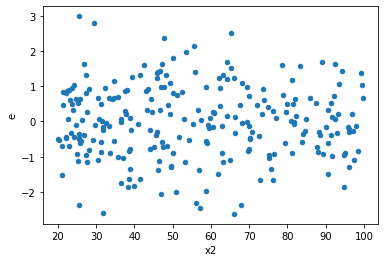

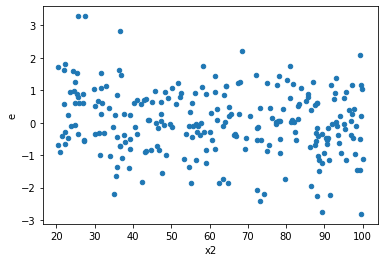

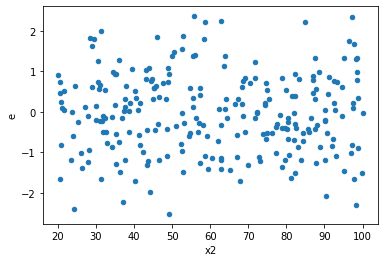

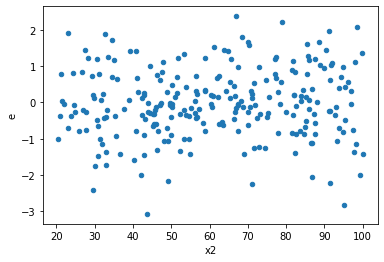

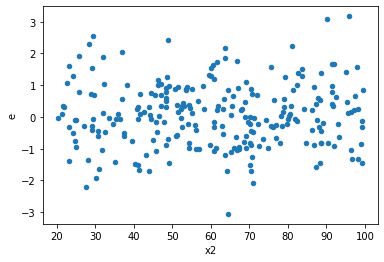

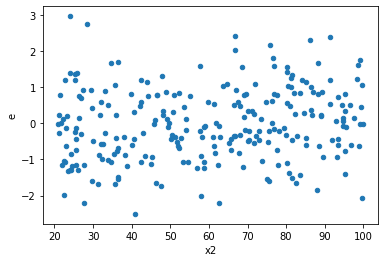

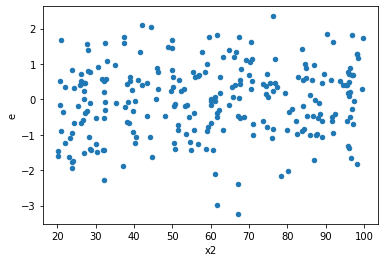

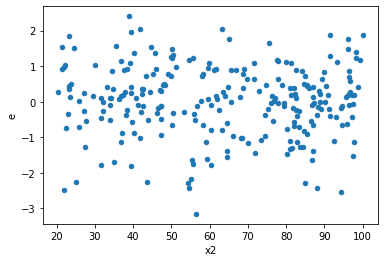

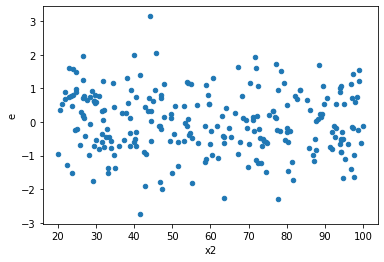

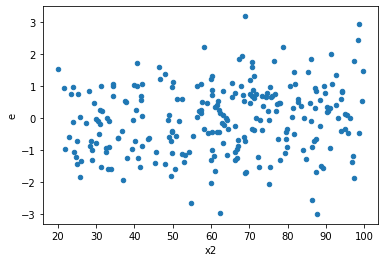

In [15]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [16]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,105.07678093593591,85.64955478099162,1.0945498014159991,0.8921828623019961,1.226822266672842,0.315751514363384,0.842124242818308,Reject005=1 : Homoscedasticity
1.0,97.0,97.0,85.3358307210607,75.07874118474804,0.8889149033443823,0.7820702206744587,1.1366177612258148,0.5294995190062814,0.7352502404968593,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,97.65476423197164,92.61689233739342,1.0172371274163712,0.9647592951811815,1.0543947412554697,0.7947517835175493,0.6026241082412254,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,96.02790531105656,95.46140816023848,1.0002906803235059,0.9943896683358174,1.0059343054092307,0.9768153981438457,0.5115923009280772,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,94.06662265923228,91.06530579787494,0.9798606527003363,0.9485969353945306,1.0329578518960771,0.8734585600860352,0.5632707199569824,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,106.53379769497984,106.09327399612314,1.1097270593227067,1.1051382707929494,1.0041522302240649,0.9837621757502344,0.5081189121248828,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,105.52296396936343,98.4779676648638,1.0991975413475357,1.0258121631756645,1.0715388068169205,0.7343478468758589,0.6328260765620706,Reject005=1 : Homoscedasticity
11.0,97.0,97.0,101.29423688557384,97.86152020569037,1.0551483008913942,1.0193908354759413,1.0350772875045104,0.8655339992911135,0.5672330003544432,Reject005=1 : Homoscedasticity
13.0,97.0,97.0,104.74732282587583,89.63645780734346,1.0911179461028733,0.9337131021598277,1.1685794529164717,0.44438399904134274,0.7778080004793286,Reject005=1 : Homoscedasticity


In [18]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,105.07678093593591,85.64955478099162,1.0945498014159991,0.8921828623019961,1.226822266672842,0.315751514363384,Reject005=1 : Homoscedasticity
1.0,97.0,97.0,85.3358307210607,75.07874118474804,0.8889149033443823,0.7820702206744587,1.1366177612258148,1.4705004809937186,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,97.65476423197164,92.61689233739342,1.0172371274163712,0.9647592951811815,1.0543947412554697,1.2052482164824507,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,79.16771827926601,99.65875043148932,0.8246637320756877,1.038111983661347,0.7943880285122586,0.25874504180234537,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,96.02790531105656,95.46140816023848,1.0002906803235059,0.9943896683358174,1.0059343054092307,1.0231846018561543,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,94.06662265923228,91.06530579787494,0.9798606527003363,0.9485969353945306,1.0329578518960771,1.1265414399139648,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,106.53379769497984,106.09327399612314,1.1097270593227067,1.1051382707929494,1.0041522302240649,1.0162378242497656,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,105.52296396936343,98.4779676648638,1.0991975413475357,1.0258121631756645,1.0715388068169205,1.2656521531241411,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,83.26619271434426,105.29951164102697,0.8673561741077527,1.0968699129273642,0.7907557349193055,0.24940448980418878,Reject005=1 : Homoscedasticity


In [19]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      965
Reject005=0 : Heteroscedasticity     35
Name: Result_test, dtype: int64

In [20]:
result_show['Result_test'].sort_values()

Replicate
932.0    Reject005=0 : Heteroscedasticity
293.0    Reject005=0 : Heteroscedasticity
351.0    Reject005=0 : Heteroscedasticity
324.0    Reject005=0 : Heteroscedasticity
347.0    Reject005=0 : Heteroscedasticity
667.0    Reject005=0 : Heteroscedasticity
464.0    Reject005=0 : Heteroscedasticity
829.0    Reject005=0 : Heteroscedasticity
791.0    Reject005=0 : Heteroscedasticity
52.0     Reject005=0 : Heteroscedasticity
115.0    Reject005=0 : Heteroscedasticity
339.0    Reject005=0 : Heteroscedasticity
57.0     Reject005=0 : Heteroscedasticity
798.0    Reject005=0 : Heteroscedasticity
426.0    Reject005=0 : Heteroscedasticity
316.0    Reject005=0 : Heteroscedasticity
935.0    Reject005=0 : Heteroscedasticity
635.0    Reject005=0 : Heteroscedasticity
83.0     Reject005=0 : Heteroscedasticity
574.0    Reject005=0 : Heteroscedasticity
196.0    Reject005=0 : Heteroscedasticity
337.0    Reject005=0 : Heteroscedasticity
483.0    Reject005=0 : Heteroscedasticity
225.0    Reject005=0 : H